https://www.analyticsvidhya.com/blog/2020/08/exploratory-data-analysiseda-from-scratch-in-python/

Based upon the attributes predict whether the loan can be approved or not

Supervised learning -> Classification(Binary)

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [119]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/refs/heads/main/loan_prediction.csv")

In [120]:
df.sample(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
365,LP002181,Male,No,0,Not Graduate,No,6216,0.0,133.0,360.0,1.0,Rural,N
364,LP002180,Male,No,0,Graduate,Yes,6822,0.0,141.0,360.0,1.0,Rural,Y
473,LP002522,Female,No,0,Graduate,Yes,2500,0.0,93.0,360.0,NaN,Urban,Y
101,LP001349,Male,No,0,Graduate,No,4843,3806.0,151.0,360.0,1.0,Semiurban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
79,LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
151,LP001529,Male,Yes,0,Graduate,Yes,2577,3750.0,152.0,360.0,1.0,Rural,Y
189,LP001647,Male,Yes,0,Graduate,No,9328,0.0,188.0,180.0,1.0,Rural,Y
263,LP001871,Female,No,0,Graduate,No,7200,0.0,120.0,360.0,1.0,Rural,Y
560,LP002807,Male,Yes,2,Not Graduate,No,3675,242.0,108.0,360.0,1.0,Semiurban,Y


In [121]:
df.shape

(614, 13)

In [122]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [123]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP002990,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: xlabel='Loan_Status', ylabel='count'>

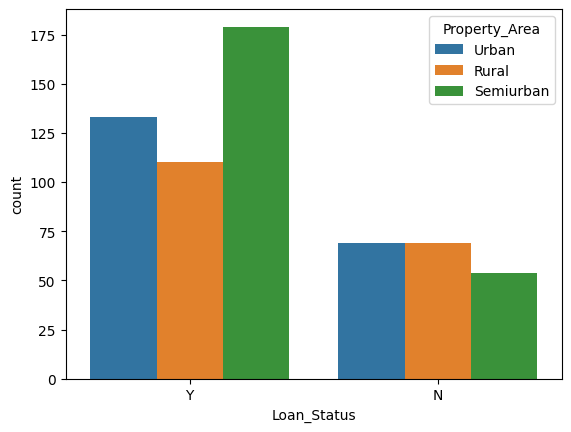

In [125]:
sns.countplot(x="Loan_Status",hue="Property_Area",data=df)

<Axes: xlabel='Loan_Status', ylabel='count'>

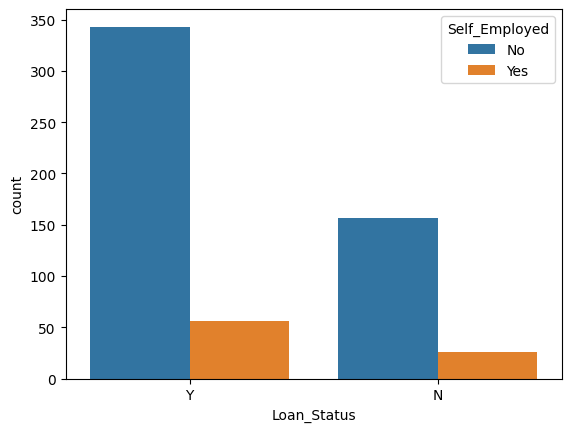

In [126]:
sns.countplot(x="Loan_Status",hue="Self_Employed",data=df)

<Axes: xlabel='Loan_Status', ylabel='count'>

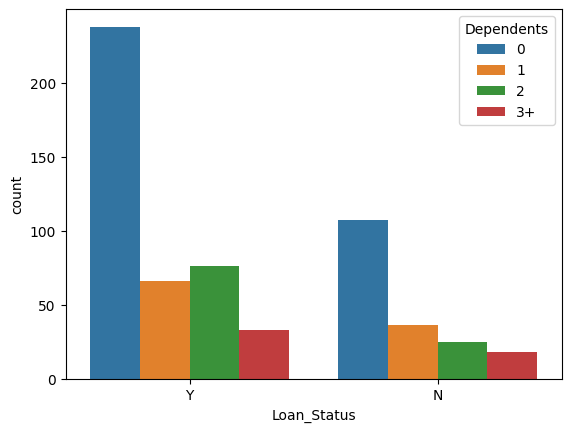

In [127]:
sns.countplot(x="Loan_Status",hue="Dependents",data=df)

In [128]:
#sns.pairplot(df,hue="Loan_Status")

In [129]:
### Data Preparation
#### Drop insignificant column

df=df.drop("Loan_ID",axis=1) #axis=1 represents column

In [130]:
df.shape

(614, 12)

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [132]:
med_amount=df["LoanAmount"].median()
med_amount

128.0

In [133]:
df["LoanAmount"]=df["LoanAmount"].replace(np.nan,med_amount)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [135]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,14
Credit_History,50


In [136]:
med_term=df["Loan_Amount_Term"].median()
med_term

360.0

In [137]:
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].replace(np.nan,med_term)

In [138]:
### credit history
med_hist=df["Credit_History"].median()
med_hist

1.0

In [139]:
df["Credit_History"]=df["Credit_History"].replace(np.nan,med_hist)

In [140]:
df.isnull().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [141]:
mode_gender=df["Gender"].mode()[0]
mode_gender

'Male'

In [142]:
df["Gender"]=df["Gender"].replace(np.nan,mode_gender)

In [143]:
df.isnull().sum()

,0
Gender,0
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [144]:
mode_married=df["Married"].mode()[0]
mode_married

'Yes'

In [145]:
df["Married"]=df["Married"].replace(np.nan,mode_married)

In [146]:
mode_dep=df["Dependents"].mode()[0]
mode_dep

'0'

In [147]:
df["Dependents"]=df["Dependents"].replace(np.nan,mode_dep)

In [148]:
mode_emp=df["Self_Employed"].mode()[0]

In [149]:
df["Self_Employed"]=df["Self_Employed"].replace(np.nan,mode_emp)

In [150]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [152]:
df=pd.get_dummies(df,columns=["Gender","Married","Education","Dependents","Self_Employed","Property_Area"],drop_first=True)

In [153]:
df.sample(10)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Dependents_1,Dependents_2,Dependents_3+,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
75,3750,0.0,113.0,480.0,1.0,N,True,False,False,False,False,False,False,False,True
463,5191,0.0,132.0,360.0,1.0,Y,False,False,True,True,False,False,False,True,False
18,4887,0.0,133.0,360.0,1.0,N,True,True,True,False,False,False,False,False,False
577,3229,2739.0,110.0,360.0,1.0,Y,True,False,False,False,False,False,False,False,True
426,4606,0.0,81.0,360.0,1.0,N,False,False,True,True,False,False,False,False,False
199,11000,0.0,83.0,360.0,1.0,N,True,False,False,False,False,False,True,False,True
587,2165,0.0,70.0,360.0,1.0,Y,False,False,True,False,False,False,False,True,False
0,5849,0.0,128.0,360.0,1.0,Y,True,False,False,False,False,False,False,False,True
102,13650,0.0,128.0,360.0,1.0,Y,True,True,False,False,False,False,False,False,True
301,2875,1750.0,105.0,360.0,1.0,Y,True,True,True,False,False,False,False,True,False


In [154]:
df.shape

(614, 15)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Loan_Status              614 non-null    object 
 6   Gender_Male              614 non-null    bool   
 7   Married_Yes              614 non-null    bool   
 8   Education_Not Graduate   614 non-null    bool   
 9   Dependents_1             614 non-null    bool   
 10  Dependents_2             614 non-null    bool   
 11  Dependents_3+            614 non-null    bool   
 12  Self_Employed_Yes        614 non-null    bool   
 13  Property_Area_Semiurban  614 non-null    bool   
 14  Property_Area_Urban      6

In [157]:
df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})

/tmp/ipython-input-647256549.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Loan_Status"]=df["Loan_Status"].replace({"Y":1,"N":0})


In [158]:
df.isnull().sum()

,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0
Loan_Status,0
Gender_Male,0
Married_Yes,0
Education_Not Graduate,0
Dependents_1,0


In [159]:
df.dtypes

,0
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64
Loan_Status,int64
Gender_Male,bool
Married_Yes,bool
Education_Not Graduate,bool
Dependents_1,bool


In [161]:
from sklearn.model_selection import train_test_split
Y=df[["Loan_Status"]]
X=df.drop("Loan_Status",axis=1)

In [162]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [163]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(X_train,Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [164]:
model_lr.score(X_train,Y_train)

0.8065268065268065

In [165]:
model_lr.score(X_test,Y_test)

0.8108108108108109